In [8]:
import pandas as pd


In [9]:
final_df = pd.read_csv("final_df.csv")

# Convert 'Date' column to datetime again (since it loads as a string from CSV)
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [10]:
# Already converted Date to datetime in Day 1
# Now let's add more features:
## Feature Engineering
final_df['Week'] = final_df['Date'].dt.isocalendar().week
final_df['Day'] = final_df['Date'].dt.day
final_df['DayOfWeek'] = final_df['Date'].dt.dayofweek  # Monday = 0, Sunday = 6
final_df['IsWeekend'] = final_df['DayOfWeek'].isin([5, 6]).astype(int)


In [17]:
## Encode Categorical Features
# One-hot encoding for 'Type'


# Ensure 'IsHoliday' is integer (0 or 1)
#  Correct version
final_df['IsHoliday_x'] = final_df['IsHoliday_x'].astype(int)
final_df['IsHoliday_y'] = final_df['IsHoliday_y'].astype(int)



In [14]:
print(final_df.columns.tolist())


['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Size', 'Year', 'Month', 'Day', 'Week', 'DayOfWeek', 'IsWeekend', 'Type_B', 'Type_C']


In [25]:
from sklearn.preprocessing import MinMaxScaler


In [26]:
scaler = MinMaxScaler()
cols_to_scale = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
                 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

final_df[cols_to_scale] = scaler.fit_transform(final_df[cols_to_scale])

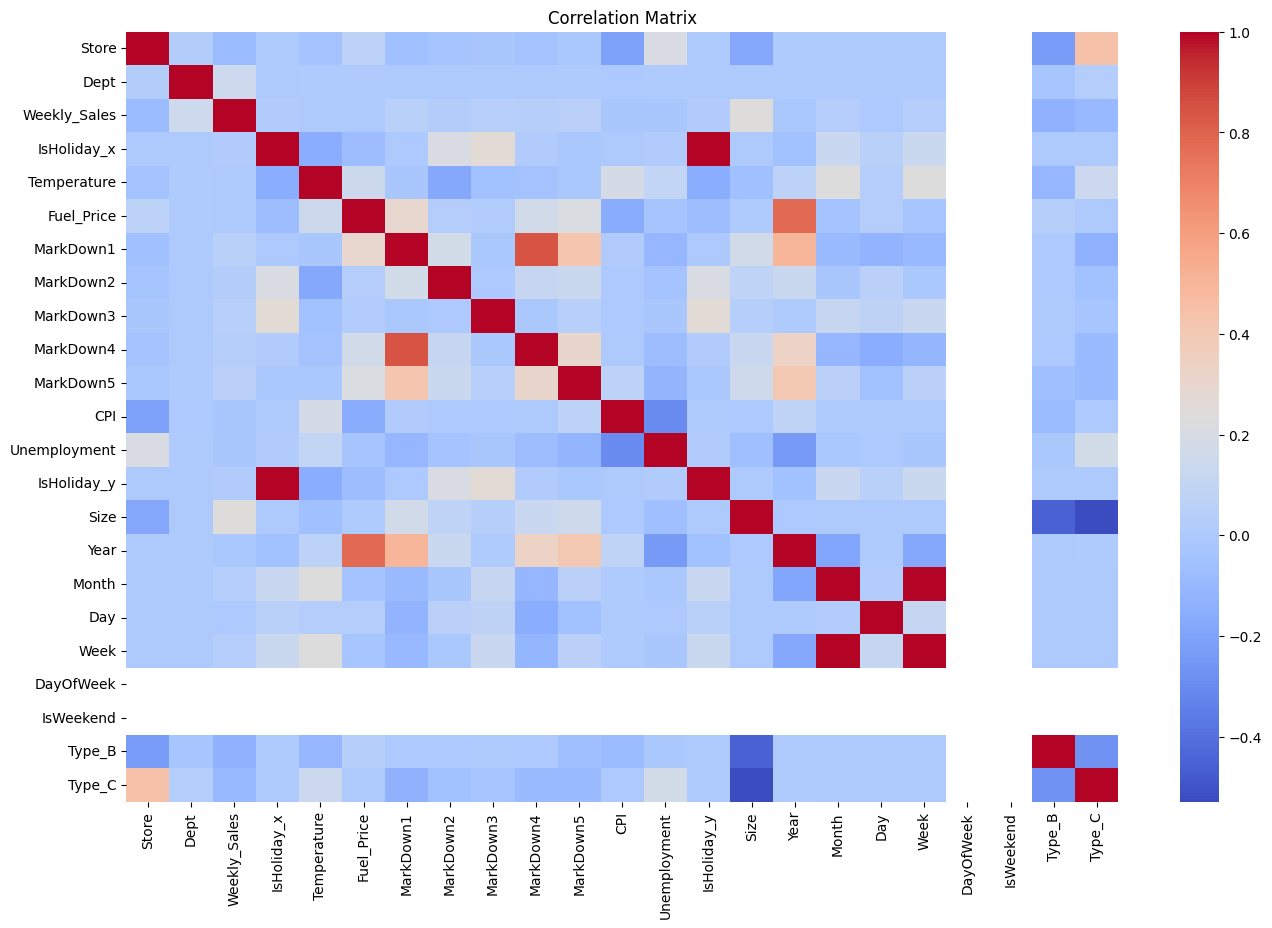

In [28]:
##4️⃣ Correlation Heatmap (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Correlation Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(final_df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()


In [29]:
##export final clean data
final_df.to_csv("final_df_cleaned.csv", index=False)
print("✅ Cleaned data with features saved as 'final_df_cleaned.csv'")


✅ Cleaned data with features saved as 'final_df_cleaned.csv'
